In [1]:
###Hide
import time
import random
import numpy as np
import pandas as pd
import scipy as sp
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg
from statsmodels.regression.linear_model import OLS
import sklearn.preprocessing as Preprocessing
import itertools as it
from itertools import combinations

from bs4 import BeautifulSoup
import urllib
# The "requests" library makes working with HTTP requests easier
# than the built-in urllib libraries
import requests

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors

from mpl_toolkits.mplot3d import Axes3D

from __future__ import division # Python 2.7 uses integer division by default, so that 5 / 2 equals 2, this sfixes that

%matplotlib inline

### Source 1: The Association Between Childhood Seizures and Later Childhood Emotional and Behavioral Problems: Findings From a Nationally Representative Birth Cohort

### Seizure Counts for Epileptics Data Description

Thall and Vail (1990) give a data set on two-week seizure counts for 59 epileptics. The number of seizures was recorded for a baseline period of 8 weeks, and then patients were randomly assigned to a treatment group or a control group. Counts were then recorded for four successive two-week periods. The subject's age is the only covariate.

#### Format
- **index** = order of the original data
- **y** = the seizure count for the 2-week period
- **trt** = treatment, administered, either "placebo" or "progabide"
- **base** = the counts in the baseline 8-week period
- **age** = subject's age, in years
- **V4** = 0 or 1 indicator variable of period 4
- **subject** = subject number, 1 to 59
- **period** = period observed, 1 to 4
- **lbase** = log-counts for the baseline period, centred to have zero mean.
- **lage** = log-ages, centered to have zero mean

In [2]:
# Open the file containing the  data
epil_df = pd.read_csv('datasets/epil.csv')

# Display the dimensions of the data with a pretty format
print "Data dimensions:"
print epil_df.shape
print "\n"

# Clean-up the data by filling missing values with the mean
epil_df.fillna(epil_df.mean())

# Display the first five rows of data
print "First five rows:"
print epil_df.head(5)
print "\n"

# Summarize the data
epil_df.describe()

Data dimensions:
(236, 10)


First five rows:
   Unnamed: 0  y      trt  base  age  V4  subject  period     lbase      lage
0           1  5  placebo    11   31   0        1       1 -0.756354  0.114204
1           2  3  placebo    11   31   0        1       2 -0.756354  0.114204
2           3  3  placebo    11   31   0        1       3 -0.756354  0.114204
3           4  3  placebo    11   31   1        1       4 -0.756354  0.114204
4           5  3  placebo    11   30   0        2       1 -0.756354  0.081414




,Unnamed: 0,y,base,age,V4,subject,period,lbase,lage
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.00000,2.360000e+02,2.360000e+02
mean,118.500000,8.254237,31.220339,28.338983,0.250000,30.000000,2.50000,-3.389830e-11,1.694910e-11
std,68.271517,12.346891,26.705051,6.261290,0.433933,17.065581,1.12041,7.461263e-01,2.224570e-01
min,1.000000,0.000000,6.000000,18.000000,0.000000,1.000000,1.00000,-1.362490e+00,-4.294118e-01
25%,59.750000,2.750000,12.000000,23.000000,0.000000,15.000000,1.75000,-6.693424e-01,-1.842893e-01
50%,118.500000,4.000000,22.000000,28.000000,0.000000,30.000000,2.50000,-6.320661e-02,1.242100e-02
75%,177.250000,9.000000,41.000000,32.000000,0.250000,45.000000,3.25000,5.593230e-01,1.459524e-01
max,236.000000,102.000000,151.000000,42.000000,1.000000,59.000000,4.00000,1.863031e+00,4.178861e-01


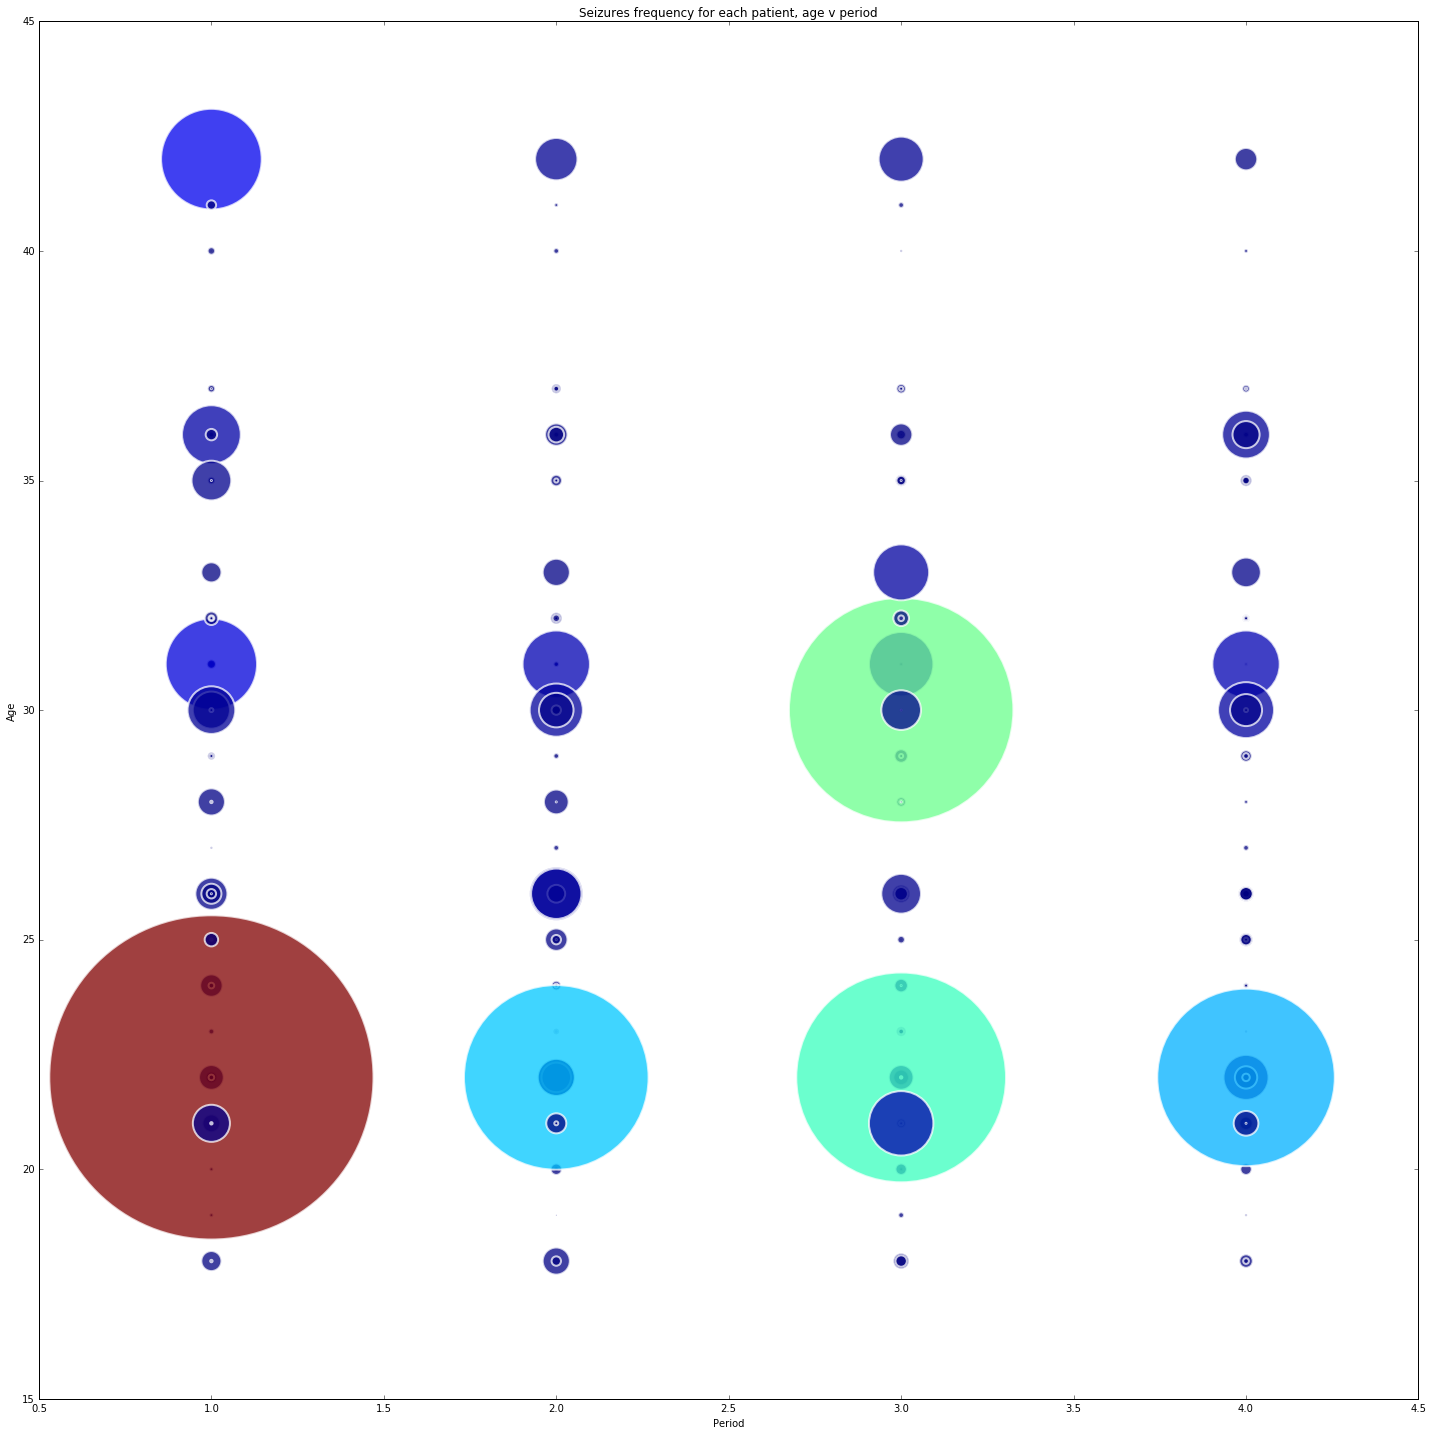

In [3]:
# Assign the patients in a given age range, and the coordinates for plotting
age, y, period =  epil_df['age'], epil_df['y']**2.5, epil_df['period']

# Create the figure
fig = plt.figure(figsize=(20,20))
ax1 = plt.axes()
ax1.scatter(period, age, s=y, c=y, linewidths=2, edgecolor='w').set_alpha(0.75)
ax1.set_xlabel('Period')
ax1.set_ylabel('Age')
ax1.set_title('Seizures frequency for each patient, age v period')
plt.tight_layout()
plt.show()

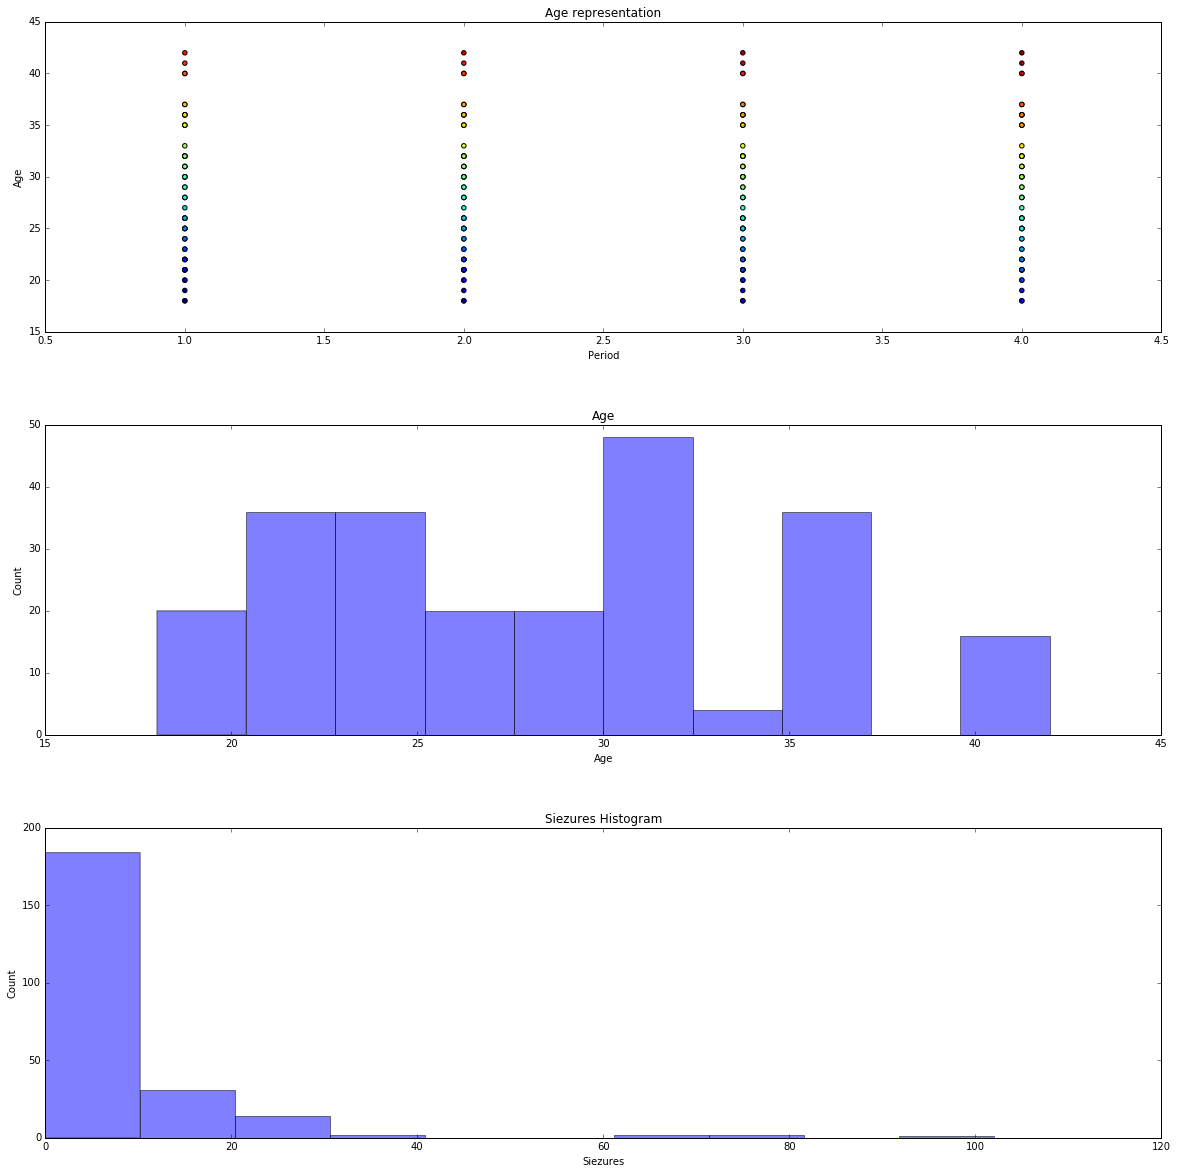

In [4]:
# Assign the patients in a given age range, and the coordinates for plotting
age, count, period =  epil_df['age'], epil_df['y'], epil_df['period']

# Create a new figure window to draw in, with a larger figure size to fill the space
fig = plt.figure(figsize=(20, 20)) 

# Add a subplot into the predefined 3 rows & 1 col figure
ax = fig.add_subplot(3, 1, 1) 
ax.set_title("Age representation") # Add the title to each subplot
ax.set_xlabel("Period") # Add the x-axis label to this subplot
ax.set_ylabel("Age") # Add the y-axis label to this subplot

# Add a subplot into the predefined 3 rows & 1 col figure
ax = fig.add_subplot(3, 1, 2)
ax.set_title("Age") # Add the title to each subplot
ax.set_xlabel("Age") # Add the x-axis label to this subplot
ax.set_ylabel("Count") # Add the y-axis label to this subplot    
    
# Add a subplot into the predefined 3 rows & 1 col figure
ax = fig.add_subplot(3, 1, 3)
ax.set_title("Siezures Histogram") # Add the title to each subplot
ax.set_xlabel("Siezures") # Add the x-axis label to this subplot
ax.set_ylabel("Count") # Add the y-axis label to this subplot  
    
# Finally, add the x, y data in the form of a scatter plot and set the color scheme, e.g c=    
fig.axes[0].scatter(period, age, c=(period+age)) 
fig.axes[1].hist(age, bins=10, alpha=0.5)
fig.axes[2].hist(count, bins=10, alpha=0.5)

fig.subplots_adjust(wspace=0.1, hspace=0.3) # Spread out the subplots so they don't overlap one another